In [47]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)
#plt.figure(figsize=(10, 10))

In [48]:
# Read the excel file
homicides_raw = pd.read_excel("data/crimes_mensuels.xlsx", sheet_name="France_Entière")

In [49]:
homicides_i2i3 = homicides_raw.loc[1:2, '_2021_12':'_2015_01']

In [50]:
homicides_i2i3

,_2021_12,_2021_11,_2021_10,_2021_09,_2021_08,_2021_07,_2021_06,_2021_05,_2021_04,_2021_03,...,_2015_10,_2015_09,_2015_08,_2015_07,_2015_06,_2015_05,_2015_04,_2015_03,_2015_02,_2015_01
1,4,0,0,4,1,3,5,5,3,4,...,2,1,1,1,1,3,3,2,1,1
2,73,72,72,68,73,76,89,84,67,70,...,66,53,46,52,53,41,56,70,39,63


In [51]:
homicides_i51 = homicides_raw.loc[50:50, '_2021_12':'_2015_01']

In [52]:
homicides_i51

,_2021_12,_2021_11,_2021_10,_2021_09,_2021_08,_2021_07,_2021_06,_2021_05,_2021_04,_2021_03,...,_2015_10,_2015_09,_2015_08,_2015_07,_2015_06,_2015_05,_2015_04,_2015_03,_2015_02,_2015_01
50,5,6,1,6,4,8,4,1,1,5,...,6,7,2,5,5,14,8,11,4,7


In [53]:
homicides_concat = pd.concat([homicides_i2i3, homicides_i51])

In [54]:
homicides_concat


,_2021_12,_2021_11,_2021_10,_2021_09,_2021_08,_2021_07,_2021_06,_2021_05,_2021_04,_2021_03,...,_2015_10,_2015_09,_2015_08,_2015_07,_2015_06,_2015_05,_2015_04,_2015_03,_2015_02,_2015_01
1,4,0,0,4,1,3,5,5,3,4,...,2,1,1,1,1,3,3,2,1,1
2,73,72,72,68,73,76,89,84,67,70,...,66,53,46,52,53,41,56,70,39,63
50,5,6,1,6,4,8,4,1,1,5,...,6,7,2,5,5,14,8,11,4,7


In [55]:
# Homicides for the plot
homicides_sum_per_months = homicides_concat.sum(axis=0)

In [56]:
# reversing the dataframe
homicides_sum_per_months = homicides_sum_per_months[::-1]  
homicides_sum_per_months

_2015_01    71
_2015_02    44
_2015_03    83
_2015_04    67
_2015_05    58
            ..
_2021_08    78
_2021_09    78
_2021_10    73
_2021_11    78
_2021_12    82
Length: 84, dtype: int64

In [57]:
attempted_homicides_i4i5 = homicides_raw.loc[3:4, '_2021_12':'_2015_01']

In [58]:
attempted_homicides_i4i5

,_2021_12,_2021_11,_2021_10,_2021_09,_2021_08,_2021_07,_2021_06,_2021_05,_2021_04,_2021_03,...,_2015_10,_2015_09,_2015_08,_2015_07,_2015_06,_2015_05,_2015_04,_2015_03,_2015_02,_2015_01
3,26,15,11,6,14,11,14,14,10,9,...,9,7,5,5,6,6,7,19,3,22
4,327,281,303,275,301,267,317,256,243,241,...,175,197,174,143,175,153,177,180,153,157


In [59]:
# Attempted homicides for the plot
attempted_homicides_sum_per_months = attempted_homicides_i4i5.sum(axis=0)

In [60]:
# reversing the dataframe
attempted_homicides_sum_per_months = attempted_homicides_sum_per_months[::-1]  
attempted_homicides_sum_per_months

_2015_01    179
_2015_02    156
_2015_03    199
_2015_04    184
_2015_05    159
           ... 
_2021_08    315
_2021_09    281
_2021_10    314
_2021_11    296
_2021_12    353
Length: 84, dtype: int64

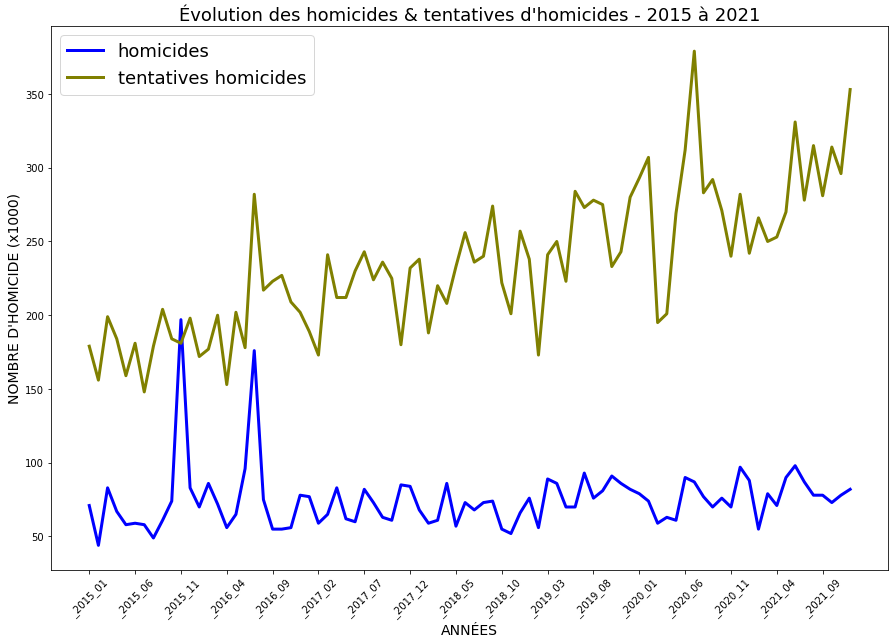

In [64]:
# dataframe for plots
df=pd.DataFrame(
    {
        'period': homicides_sum_per_months.index,
        'homicides': homicides_sum_per_months.values,
        'tentatives homicides': attempted_homicides_sum_per_months.values
    })

# multiple line plots
plt.plot( 'period', 'homicides', data=df, marker='', markerfacecolor='blue', markersize=12, color='blue', linewidth=3)
plt.plot( 'period', 'tentatives homicides', data=df, marker='', markersize=12, color='olive', linewidth=3)

# title, ticks
plt.title("Évolution des homicides & tentatives d'homicides - 2015 à 2021", fontsize=18)
plt.xticks(np.arange(0, homicides_sum_per_months.index.size, 5), rotation=45)
plt.ylabel("NOMBRE D'HOMICIDE (x1000)", fontsize=14)
plt.xlabel('ANNÉES', fontsize=14)

# show legend
plt.legend(fontsize=18)

# show graph
plt.show()
